In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
from types import SimpleNamespace

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

import benchmark

In [5]:
out = {}
for size, d_model, d_ff, num_layers, num_heads in [
    ("small", 768, 3072, 12, 12),
    ("medium", 1024, 4096, 24, 16),
    ("large", 1280, 5120, 36, 20),
    ("xl", 1600, 6400, 48, 25),
    ("2.7b", 2560, 10240, 32, 32),
]:
    fw_time, bw_time = benchmark.main(
        SimpleNamespace(
            vocab_size=10_000,
            context_length=128,
            d_model=d_model,
            num_layers=num_layers,
            num_heads=num_heads,
            d_ff=d_ff,
            attn_pdrop=0.0,
            residual_pdrop=0.0,
            batch_size=16,
            warmup_steps=1,
            benchmark_steps=5,
        )
    )
    out[size] = fw_time, bw_time

=== Forward ===
All:	tensor([0.0471, 0.0429, 0.0430, 0.0503, 0.0506])
Mean:	4.68e-02
Std:	3.75e-03
=== Backward ===
All:	tensor([0.0845, 0.0877, 0.0876, 0.0902, 0.0922])
Mean:	8.85e-02
Std:	2.91e-03
=== Forward ===
All:	tensor([0.0934, 0.1277, 0.1136, 0.1885, 0.1678])
Mean:	1.38e-01
Std:	3.91e-02
=== Backward ===
All:	tensor([0.2971, 0.2273, 0.3268, 0.4993, 0.2448])
Mean:	3.19e-01
Std:	1.08e-01
=== Forward ===
All:	tensor([0.3141, 0.3054, 0.2276, 0.3046, 0.3345])
Mean:	2.97e-01
Std:	4.08e-02
=== Backward ===
All:	tensor([0.7742, 0.6226, 0.5928, 0.5348, 0.8920])
Mean:	6.83e-01
Std:	1.46e-01
=== Forward ===
All:	tensor([0.6531, 0.5390, 0.5627, 0.5668, 0.5579])
Mean:	5.76e-01
Std:	4.44e-02
=== Backward ===
All:	tensor([1.1748, 1.1641, 1.1510, 1.1650, 1.1747])
Mean:	1.17e+00
Std:	9.82e-03
=== Forward ===
All:	tensor([0.8504, 0.8514, 0.8644, 0.8431, 0.8496])
Mean:	8.52e-01
Std:	7.79e-03
=== Backward ===
All:	tensor([1.8213, 1.8172, 1.8168, 1.8217, 1.8125])
Mean:	1.82e+00
Std:	3.74e-03


In [18]:
df = []
for size, (fw_time, bw_time) in out.items():
    df.append({"size": size, "pass": "forward", "time": fw_time.mean().item()})
    df.append({"size": size, "pass": "backward", "time": bw_time.mean().item()})
df = pd.DataFrame(df)
df

,size,pass,time
0,small,forward,0.046799
1,small,backward,0.088455
2,medium,forward,0.138213
3,medium,backward,0.319056
4,large,forward,0.297237
5,large,backward,0.683260
6,xl,forward,0.575887
7,xl,backward,1.165931
8,2.7b,forward,0.851775
9,2.7b,backward,1.817886


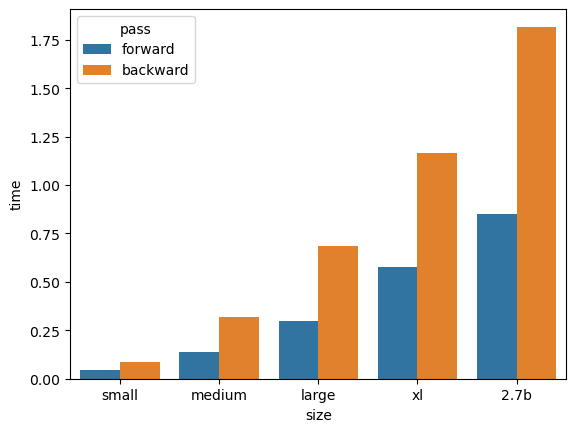

In [19]:
# TODO: add error bar
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=df, x="size", y="time", hue="pass")
fig.show()